<a href="https://colab.research.google.com/github/cristianalethangads/projetoads/blob/main/projetoads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre a aluna e o projeto

Aluna: Cristiana Lethang Cardozo dos Santos

Projeto: Análise de Dados no dataset HAM10000

Software Product: Analysis, Specification, Project & Implementation
202601 - EAD - ADS 5A

Faculdade Impacta

Professor Antonio de Oliveira Dias


# Imports

In [2]:
# Visualização
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
from PIL import Image

# Geral
import numpy as np
import pandas as pd

# System
import os

from glob import glob
import shutil

import seaborn as sns

# Estilos do Seaborn para melhorar a estética
sns.set(style="whitegrid")
spectral = sns.color_palette("Spectral", as_cmap=True)

# Criando o dataframe do Pandas

Sobre o dataset
O HAM10000 (HAM = Human Against the Machine) é um banco de dados público com 10.015 imagens dermatoscópicas de várias lesões de pele.

Fonte:
https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000?resource=download

Legendas das lesões (ENG-PT):

nv = melanocytic nevi - nevo melanocítico

mel = melanoma - melanoma

bkl = benign keratosis-like lesions - lesões ceratose-like benignas

bcc = basal cell carcinoma - carcinoma basocelular

akiec = actinic keratoses - ceratose actínica

vasc = vascular lesions - lesões vasculares

df = dermatofibroma - dermatofibroma


In [3]:
# Install gdown if not already installed
!pip install gdown -q

import gdown

ham10000_file_id = '1-5rwLqyWF5WcRFhXB_ZquDD1j-sBoeGl'
file_name = 'skin_df.csv' # Define a local filename

# Use the direct download link from the kernel state
ham10000_file_direct_link = f'https://drive.google.com/uc?export=download&id={ham10000_file_id}'

# Try downloading the file using wget instead of gdown
!wget --no-check-certificate '{ham10000_file_direct_link}' -O '{file_name}'

# Read the CSV file into a pandas DataFrame from the local file
skin_df = pd.read_csv(file_name)

--2026-02-21 20:53:44--  https://drive.google.com/uc?export=download&id=1-5rwLqyWF5WcRFhXB_ZquDD1j-sBoeGl
Resolving drive.google.com (drive.google.com)... 74.125.135.100, 74.125.135.138, 74.125.135.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-5rwLqyWF5WcRFhXB_ZquDD1j-sBoeGl&export=download [following]
--2026-02-21 20:53:44--  https://drive.usercontent.google.com/download?id=1-5rwLqyWF5WcRFhXB_ZquDD1j-sBoeGl&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2345964 (2.2M) [application/octet-stream]
Saving to: ‘skin_df.csv’

skin_df.csv         100%[===================>]   2.24M  --.-KB/s 

# Análise Exploratória dos Dados

In [4]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/PUCRS/Ap Profundo 2/HAM...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/PUCRS/Ap Profundo 2/HAM...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/PUCRS/Ap Profundo 2/HAM...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/PUCRS/Ap Profundo 2/HAM...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/PUCRS/Ap Profundo 2/HAM...,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [5]:
# Informações básicas do dataset
print(f"Number of samples: {len(skin_df)}")
print(f"Columns in the dataset: {skin_df.columns.tolist()}")
print(f"Number of missing values:\n{skin_df.isnull().sum()}")

# Resumo das estatísticas
print(skin_df.describe())

Number of samples: 10015
Columns in the dataset: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization', 'image_path', 'image']
Number of missing values:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
image_path       0
image            0
dtype: int64
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [ ]:
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [ ]:
skin_df.nunique()

,0
lesion_id,7470
image_id,10015
dx,7
dx_type,4
age,18
sex,3
localization,15
image_path,10015
image,10015


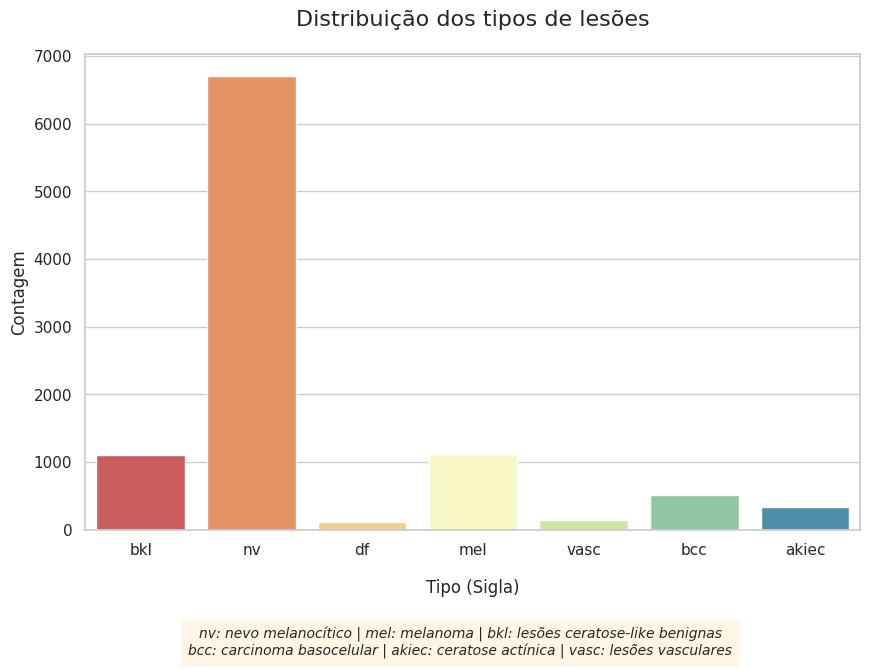

In [6]:
# Definir uma paleta discreta usando cores da paleta "Spectral"
discrete_palette = sns.color_palette("Spectral", n_colors=7)

# Definindo o dicionário de mapeamento para facilitar a legenda
legenda_texto = (
    "nv: nevo melanocítico | mel: melanoma | bkl: lesões ceratose-like benignas\n"
    "bcc: carcinoma basocelular | akiec: ceratose actínica | vasc: lesões vasculares"
)

# Distribuição dos tipos
plt.figure(figsize=(10, 7))
sns.countplot(x='dx', data=skin_df, palette=discrete_palette, hue='dx', legend=False)

plt.title('Distribuição dos tipos de lesões', fontsize=16, pad=20)
plt.ylabel('Contagem', fontsize=12)
plt.xlabel('Tipo (Sigla)', fontsize=12, labelpad=15)

# Adicionando o texto na parte inferior da figura
plt.figtext(0.5, 0.02, legenda_texto, ha="center", fontsize=10,
            bbox={"facecolor":"orange", "alpha":0.1, "pad":5}, style='italic')
plt.subplots_adjust(bottom=0.2)

plt.show()

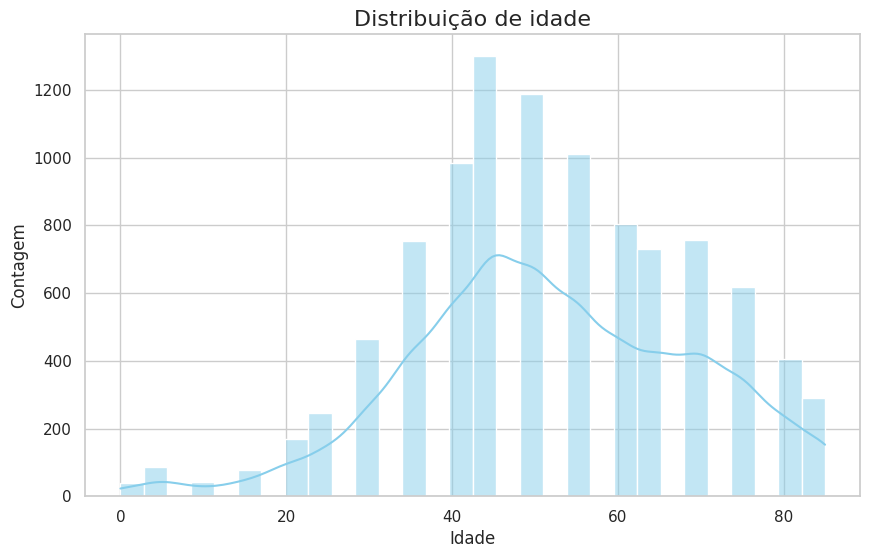

In [ ]:
# Idade
plt.figure(figsize=(10, 6))
sns.histplot(skin_df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de idade', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

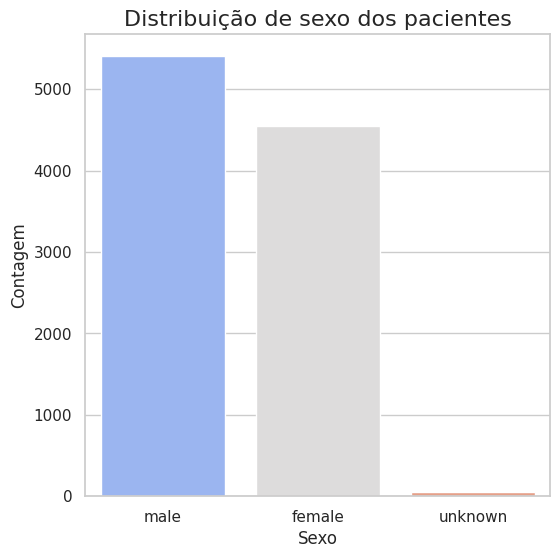

In [ ]:
# Sexo
plt.figure(figsize=(6, 6))
sns.countplot(data=skin_df, x='sex', hue='sex', palette='coolwarm', legend=False)
plt.title('Distribuição de sexo dos pacientes', fontsize=16)
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

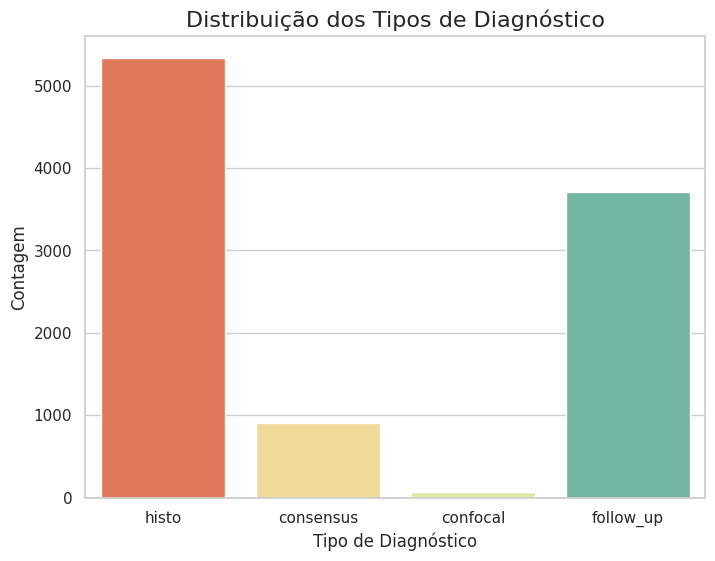

In [7]:
# Definir uma paleta discreta usando cores da paleta "Spectral"
discrete_palette = sns.color_palette("Spectral", n_colors=4)

# Visualizar a distribuição dos tipos de diagnóstico
plt.figure(figsize=(8, 6))

# Correção: Adicionado hue='dx_type' e legend=False
sns.countplot(data=skin_df, x='dx_type', hue='dx_type', palette=discrete_palette, legend=False)

plt.title('Distribuição dos Tipos de Diagnóstico', fontsize=16)
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Contagem')
plt.show()

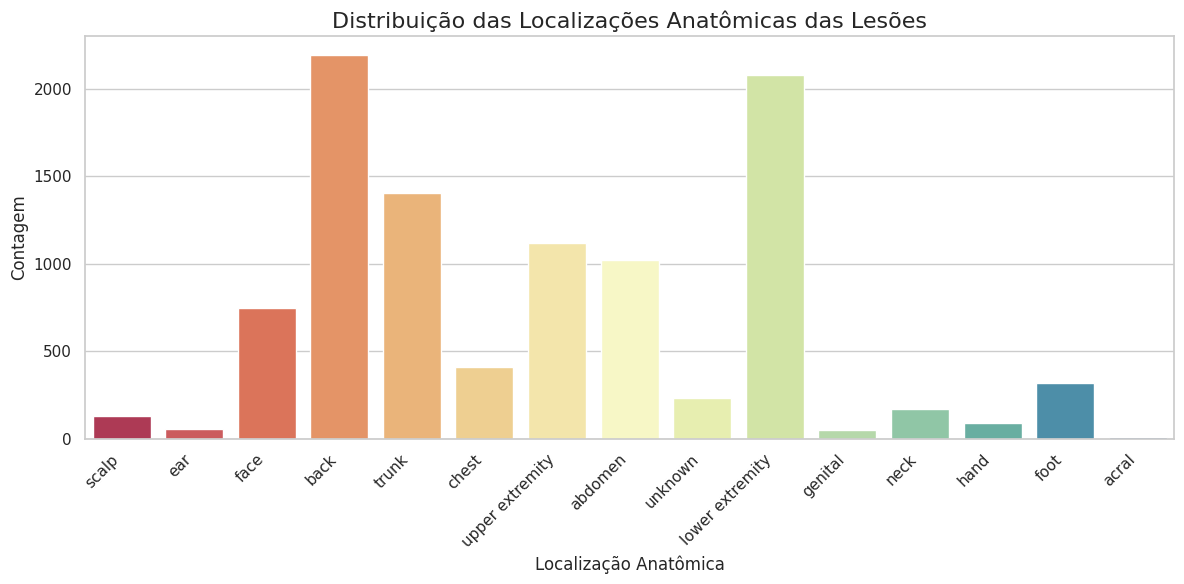

In [ ]:
# Definir uma paleta discreta usando cores da paleta "Spectral"
discrete_palette = sns.color_palette("Spectral", n_colors=15)

# Visualizar a distribuição das localizações anatômicas
plt.figure(figsize=(12, 6))

sns.countplot(
    data=skin_df,
    x='localization',
    hue='localization',
    palette=discrete_palette,
    legend=False
)

plt.title('Distribuição das Localizações Anatômicas das Lesões', fontsize=16)
plt.xlabel('Localização Anatômica')
plt.ylabel('Contagem')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Evita que os nomes das localizações fiquem fora da imagem
plt.show()

# Parte 1

Distribuição Anatômica de Lesões: Homens vs Mulheres - Mapa de calor

Essa análise toca na biologia comportamental, tentando demonstrar os diferentes  padrões de exposição ao sol entre os sexos: homens fazem mais trabalho braçal e espera-se que tenham mais lesões no dorso, enquanto mulheres expõe-se mais ao sol para se bronzear, e passam menos protetor solar nas pernas, portanto espera-se uma maior quantidade de melanoma nas pernas

Calculamos a proporção (%) dentro de cada sexo. Isso evita que o mapa pareça "mais quente" para os homens, pois, como vimos, o dataset possui um pouco mais de homens do que mulheres.

Diferença nas Pernas (lower extremity): Na literatura, as mulheres costumam ter uma concentração significativamente maior de lesões nas pernas do que os homens. Se o seu gráfico mostrar isso, você pode citar que isso reflete hábitos históricos de vestimenta e exposição solar.

Diferença no Tronco (back / trunk): Homens tendem a apresentar mais lesões no dorso e tronco.

Equilíbrio na Face: Regiões como face e scalp costumam ser áreas de alta incidência para ambos, mas o couro cabeludo (scalp) tende a ser mais frequente em homens (devido à calvície e falta de proteção capilar contra o sol).

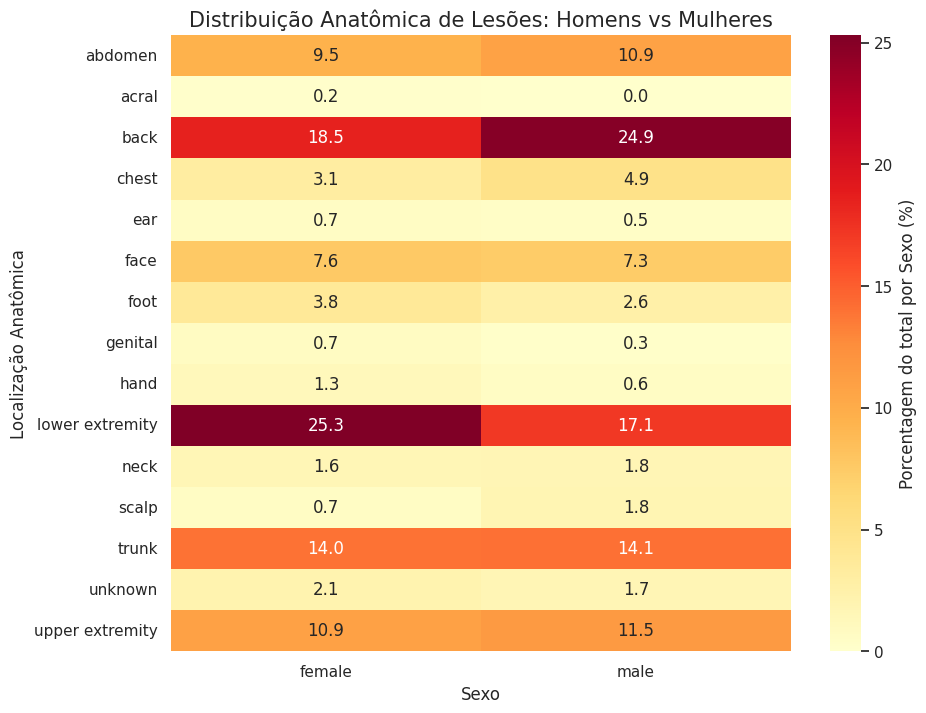

In [8]:
# Limpeza básica: remover sexos 'unknown' para uma comparação limpa
df_filtered = skin_df[skin_df['sex'].isin(['male', 'female'])].copy()

# Criar uma tabela de frequências (Crosstab)
ctab = pd.crosstab(df_filtered['localization'], df_filtered['sex'])

# Normalização
ctab_pct = ctab.div(ctab.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(ctab_pct,
            annot=True,      # Mostra os números dentro dos quadrados
            fmt=".1f",       # Formata para 1 casa decimal
            cmap="YlOrRd",   # Cores: Amarelo para Vermelho (quente)
            cbar_kws={'label': 'Porcentagem do total por Sexo (%)'})

plt.title('Distribuição Anatômica de Lesões: Homens vs Mulheres', fontsize=15)
plt.ylabel('Localização Anatômica')
plt.xlabel('Sexo')
plt.show()

Podemos observar:

Diferença nas Pernas (lower extremity): Na literatura, as mulheres costumam ter uma concentração significativamente maior de lesões nas pernas do que os homens. Meu gráfico mostrar isso, o que reflete os hábitos históricos de vestimenta e exposição solar nas mulheres.

Diferença no Tronco (back): Homens tendem a apresentar mais lesões no dorso, e também podemos evidenciar isso em meu gráfico.

Couro cabeludo (scalp): tende a ser mais frequente em homens (devido à calvície e falta de proteção capilar contra o sol).

Referência bibliográfica:  Hematol Oncol Clin North Am. 2024 Jun 15;38(5):939–952. doi: 10.1016/j.hoc.2024.05.005  - Nevi and Melanoma - Yifan Zhang 1, Stephen M Ostrowski 1, David E Fisher 1

## Filtrando melanoma

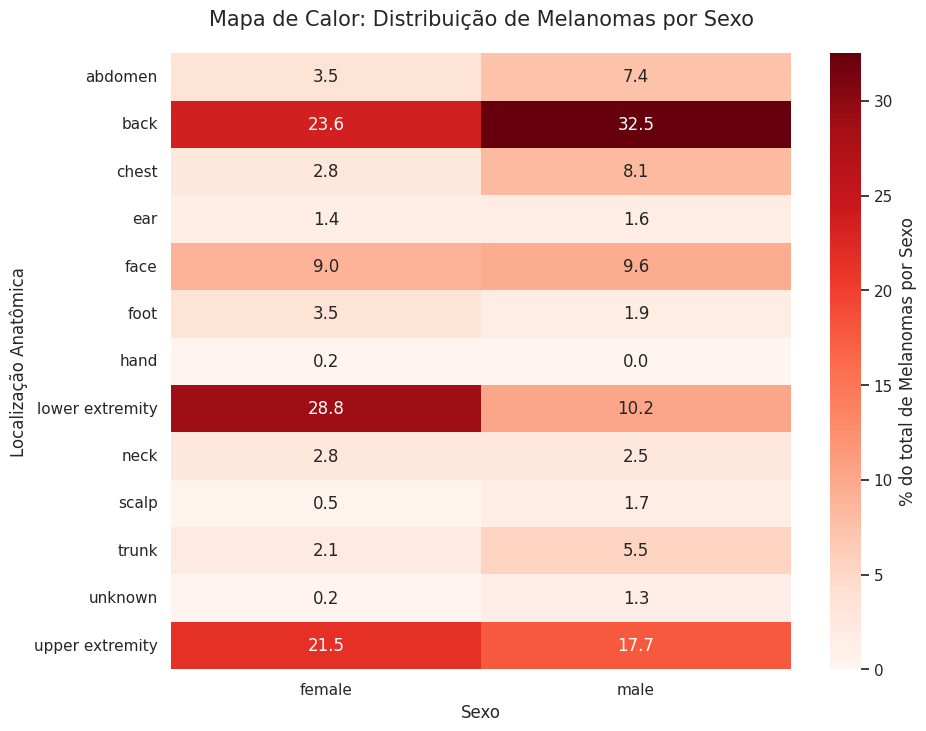

In [9]:
# Filtrar apenas casos de Melanoma ('mel') e remover sexos desconhecidos
mel_df = skin_df[(skin_df['dx'] == 'mel') & (skin_df['sex'].isin(['male', 'female']))].copy()

# Criar a tabela de frequências (Localização x Sexo)
ctab_mel = pd.crosstab(mel_df['localization'], mel_df['sex'])

# Normalização por Coluna
ctab_mel_pct = ctab_mel.div(ctab_mel.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(ctab_mel_pct,
            annot=True,      # Mostra o valor percentual dentro do quadrado
            fmt=".1f",       # Formata para uma casa decimal
            cmap="Reds",     # Tons de vermelho para destacar áreas críticas
            cbar_kws={'label': '% do total de Melanomas por Sexo'})

plt.title('Mapa de Calor: Distribuição de Melanomas por Sexo', fontsize=15, pad=20)
plt.ylabel('Localização Anatômica')
plt.xlabel('Sexo')
plt.show()

Conforme esperado, podemos ver que, filtrando o melanoma, as diferenças encontradas anteriormente tornaram-se ainda mais evidentes.